<a href="https://colab.research.google.com/github/faeqsu10/data-analysis-practice/blob/main/img_classification_ipyb(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds
import tensorflow as tf

In [2]:
data_train, ds_info = tfds.load('cats_vs_dogs', split=[tfds.Split.TRAIN], with_info=True)
ds_info

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteZD7RP1/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_path=PosixGPath('/tmp/tmpebck11kftfds'),
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
  

In [10]:
images = [one['image'].numpy() for one in data_train[0].take(30)]
len(images)

30

(-0.5, 349.5, 261.5, -0.5)

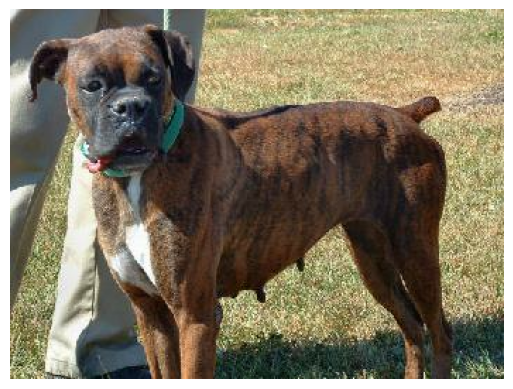

In [13]:
plt.imshow(images[0])
plt.axis('off')

In [14]:
resnet50_pre = tf.keras.applications.resnet.ResNet50(weights='imagenet', input_shape=(224,224,3))
resnet50_pre.summary()

102967424/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [15]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions

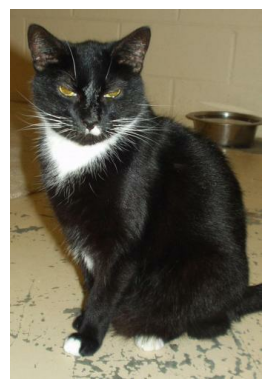

35363/35363 [==============================] - 0s 0us/step
1위 : Egyptian_cat (38.22%)
2위 : Siamese_cat (35.52%)
3위 : tabby (14.97%)
4위 : tiger_cat (2.86%)
5위 : schipperke (1.02%)


In [16]:
def pred_img(img):
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  img_resized = cv2.resize(img, (224,224))
  pred = resnet50_pre.predict(img_resized.reshape([1,224,224,3]))
  decoded_pred = decode_predictions(pred)

  for i, instance in enumerate(decoded_pred[0]):
    print('{}위 : {} ({:.2f}%)'.format(i+1, instance[1], instance[2]*100))
pred_img(images[18])